Importation des library

In [2]:
import pandas as pd
import numpy as np
import vectorbt as vbt
import matplotlib.pyplot as plt
import anywidget
import os
plt.style.use('dark_background')

Chargement des données

In [3]:
# Télécharger les données (Utilise Python Binance)
# a PARTIR D'une date jusqu'a aujourd'hui (intervale 15 minutes)
symbol = ['ETHUSDT']
#day
time = "5m"
# Téléchargement des données
data = vbt.BinanceData.download(
    symbol, 
    start='2025-10-01', 
    interval=time
)

0it [00:00, ?it/s]

Mise en forme des données

In [4]:
# Agencement des données + index + mis à l'heure de paris
df_raw = data.get(['Close','Open','High','Low','Volume']).copy()
df_raw.index = df_raw.index.tz_convert('Europe/Paris')
df_raw.tail()

,Close,Open,High,Low,Volume
Open time,,,,,
2025-12-11 21:35:00+01:00,3212.47,3213.79,3214.26,3202.13,1536.3403
2025-12-11 21:40:00+01:00,3215.83,3212.48,3222.85,3211.46,1653.8128
2025-12-11 21:45:00+01:00,3211.74,3215.84,3218.50,3210.00,953.5268
2025-12-11 21:50:00+01:00,3214.67,3211.74,3220.62,3211.74,1351.7949
2025-12-11 21:55:00+01:00,3225.75,3214.66,3225.79,3214.38,1125.2751


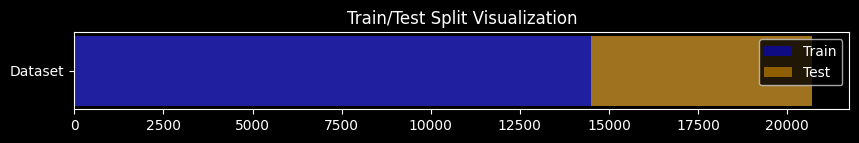

In [5]:
# Separation des données en train et test (IS/OOS) (70/30%)
split_idx = int(0.7*len(df_raw))
train_data = df_raw.iloc[:split_idx]
test_data = df_raw.iloc[split_idx:]

# Affichage de la séparation des données
plt.figure(figsize=(10, 1))
plt.barh(['Dataset'], [len(df_raw)], color='lightgray', alpha=0.3)
plt.barh(['Dataset'], [split_idx], color='blue', alpha=0.5, label='Train')
plt.barh(['Dataset'], [len(df_raw)-split_idx], left=split_idx, color='orange', alpha=0.5, label='Test')
plt.title('Train/Test Split Visualization')
plt.legend()
plt.show()

In [6]:
# Selection du train_set comme données d'entrainement
df = test_data.copy()

In [7]:
import plotly.graph_objects as go

# Calcul des moyennes mobiles
df['SMA_21'] = df['Close'].rolling(window=21).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

fig = go.Figure()

# Ajout des moyennes mobiles d'abord (elles seront derrière)
fig.add_trace(go.Scatter(
    x=df.index, y=df['SMA_21'],
    mode='lines', name='SMA 21', line=dict(color='blue'), opacity=0.5
))
fig.add_trace(go.Scatter(
    x=df.index, y=df['SMA_50'],
    mode='lines', name='SMA 50', line=dict(color='orange'), opacity=0.5
))
fig.add_trace(go.Scatter(
    x=df.index, y=df['SMA_200'],
    mode='lines', name='SMA 200', line=dict(color='red'), opacity=0.5
))

# Ajout des bougies (elles seront au premier plan)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Bougies'
))

fig.update_layout(
    template='plotly_dark',
    yaxis=dict(fixedrange=False),
    xaxis=dict(fixedrange=False),
    title="Bougies + Moyennes Mobiles 21/50/200",
    xaxis_title="Date",
    yaxis_title="Prix",
    hovermode="x unified",
    height=700
)

fig.show()